In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle as pkl

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
from joblib import dump, load

In [29]:
df = pd.read_excel('Final_data1.xlsx',index_col=0)

In [30]:
df.head()

,Sequence,Current weights
0,1,1025.51
1,2,1025.94
2,3,1025.50
3,4,1022.96
4,5,1016.16


In [31]:
weights = df['Current weights']

In [32]:
weights

0     1025.51
1     1025.94
2     1025.50
3     1022.96
4     1016.16
       ...   
95     322.84
96     314.64
97     306.68
98     299.00
99     291.26
Name: Current weights, Length: 100, dtype: float64

In [33]:
points = np.arange(100)
data = weights

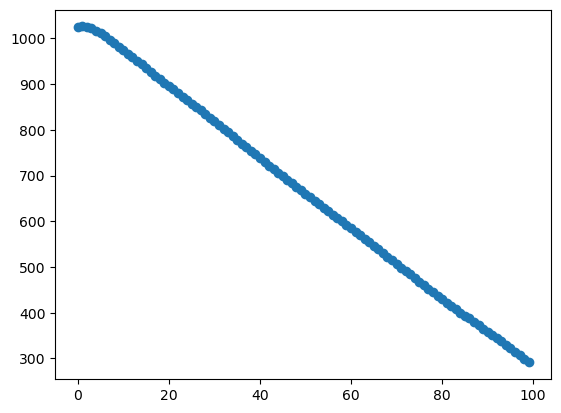

In [34]:
plt.scatter(points,data)

In [35]:
#scalar = MinMaxScaler(feature_range=(0, 1))

In [36]:
#min_max = scalar.fit(df)

In [37]:
#data = min_max.transform(df)

In [38]:
#x = data[:,1].reshape(-1,1)

In [39]:
#y = data[:,0].reshape(-1,1)

In [40]:
x = df['Current weights'].values.reshape(-1,1)

In [41]:
y = df['Sequence'].values.reshape(-1,1)

In [42]:
linear_regression = LinearRegression(fit_intercept= True)

In [43]:
model = linear_regression.fit(x,y)

In [44]:
prediction = model.predict([[0]])
prediction

array([[137.33451607]])

In [45]:
dump(linear_regression, 'linear_model.joblib')

['linear_model.joblib']

In [46]:
test_model = load('linear_model.joblib')

In [47]:
test_model.predict([[0]])

array([[137.33451607]])

In [48]:
def prediction():
  print('model can predict in range of 0 - 1000 ml')
  try:
    weight = int(input('Enter The weight in gm/ml to predict:'))
    if not (weight > 0 and weight < 1000):
      return print('Enter the value between 0-1000 ml or gm')
  except:
    return print('You entered invalid input')
  test_model = load('linear_model.joblib')
  sequence = test_model.predict([[weight]])
  hrs = (sequence*5)/60
  return print(hrs[0,0],'hours')
  

In [49]:
prediction()

model can predict in range of 0 - 1000 ml


In [ ]:
prediction()

model can predict in range of 0 - 1000 ml
Enter The weight in gm/ml to predict:500
6.016642671974657 hours
